# KNN Assignment-2
Prepare a model for glass classification using KNN
Data Description:
RI : refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
AI: Aluminum
Si: Silicon
K:Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
Type: Type of glass: (class attribute)
1 -- building_windows_float_processed
 2 --building_windows_non_float_processed
 3 --vehicle_windows_float_processed
 4 --vehicle_windows_non_float_processed (none in this database)
 5 --containers
 6 --tableware
 7 --headlamps

In [1]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV,KFold
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
##---EDA---
df.shape

(214, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
list(df)

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

In [7]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


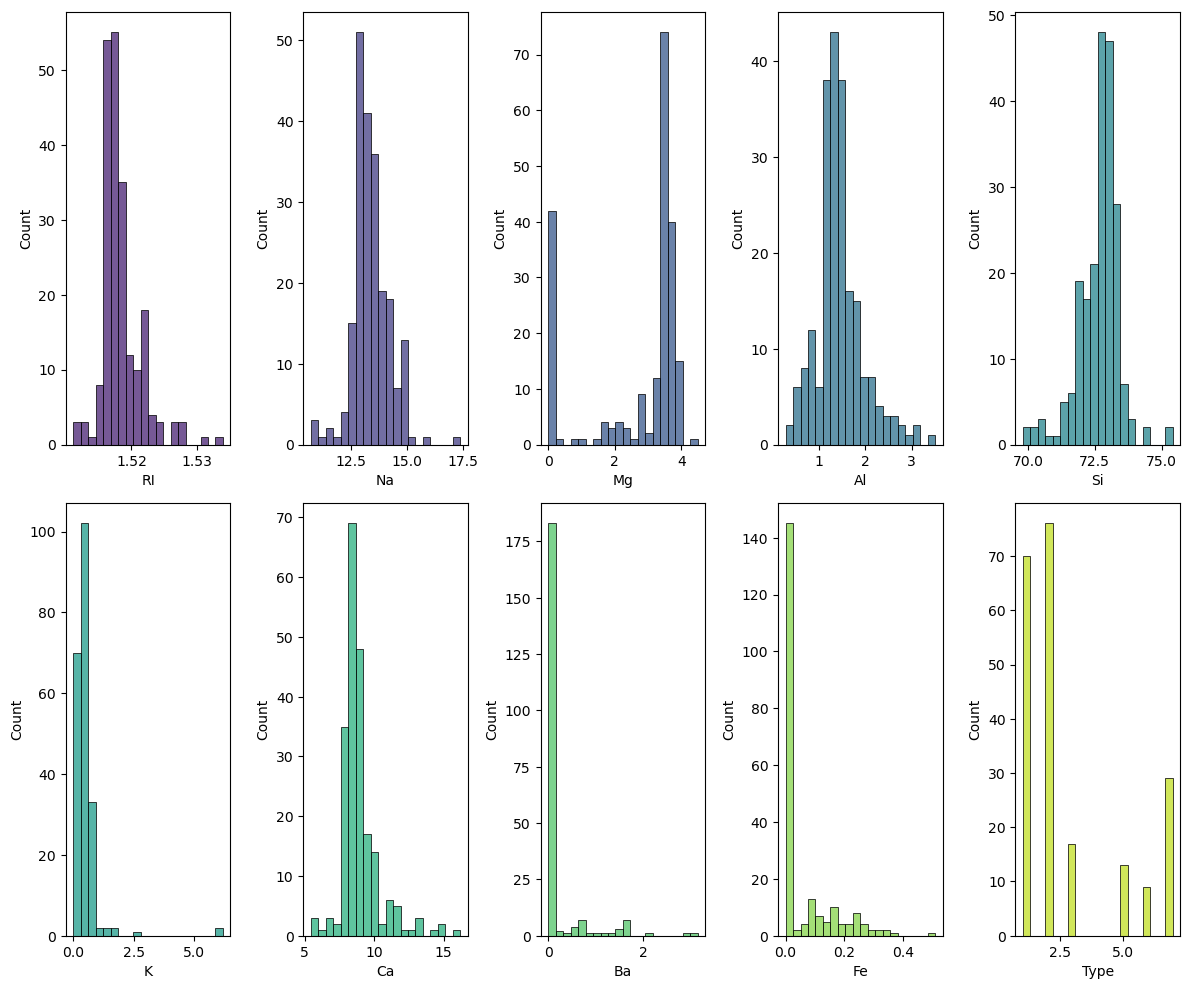

In [8]:
##--Histogram---##
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12,10))
h1 = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.histplot(data=df, x=variable, ax=axes[i // 5, i % 5], color=color, bins=20)
plt.tight_layout()
plt.show()

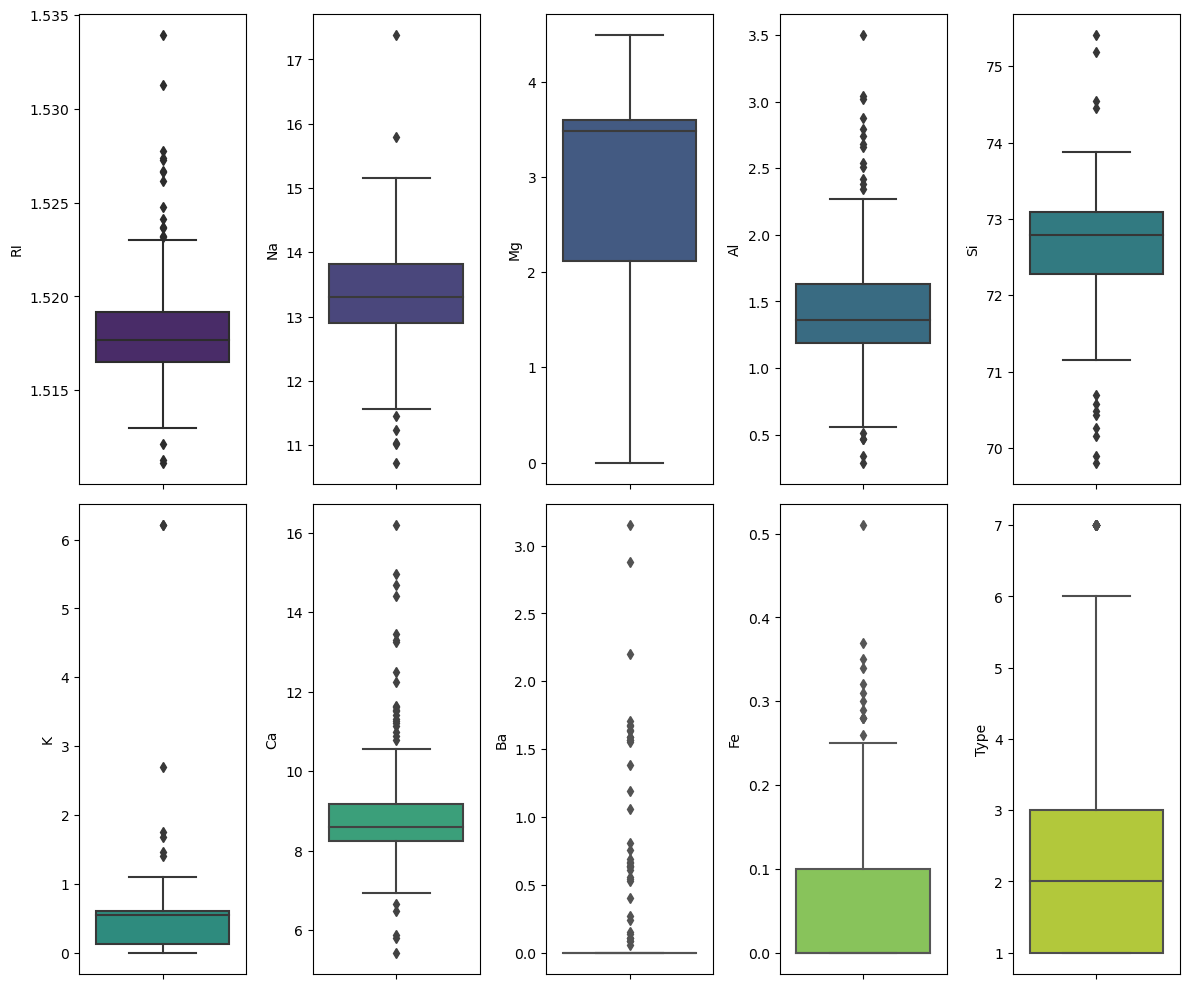

In [9]:
##--Boxplot---
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
b1 = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
colors = sns.color_palette('viridis', n_colors=len(b1))
for i, (variable, color) in enumerate(zip(b1, colors)):
    sns.boxplot(data=df, y=variable, ax=axes[i // 5, i % 5], color=color)
plt.tight_layout()
plt.show()

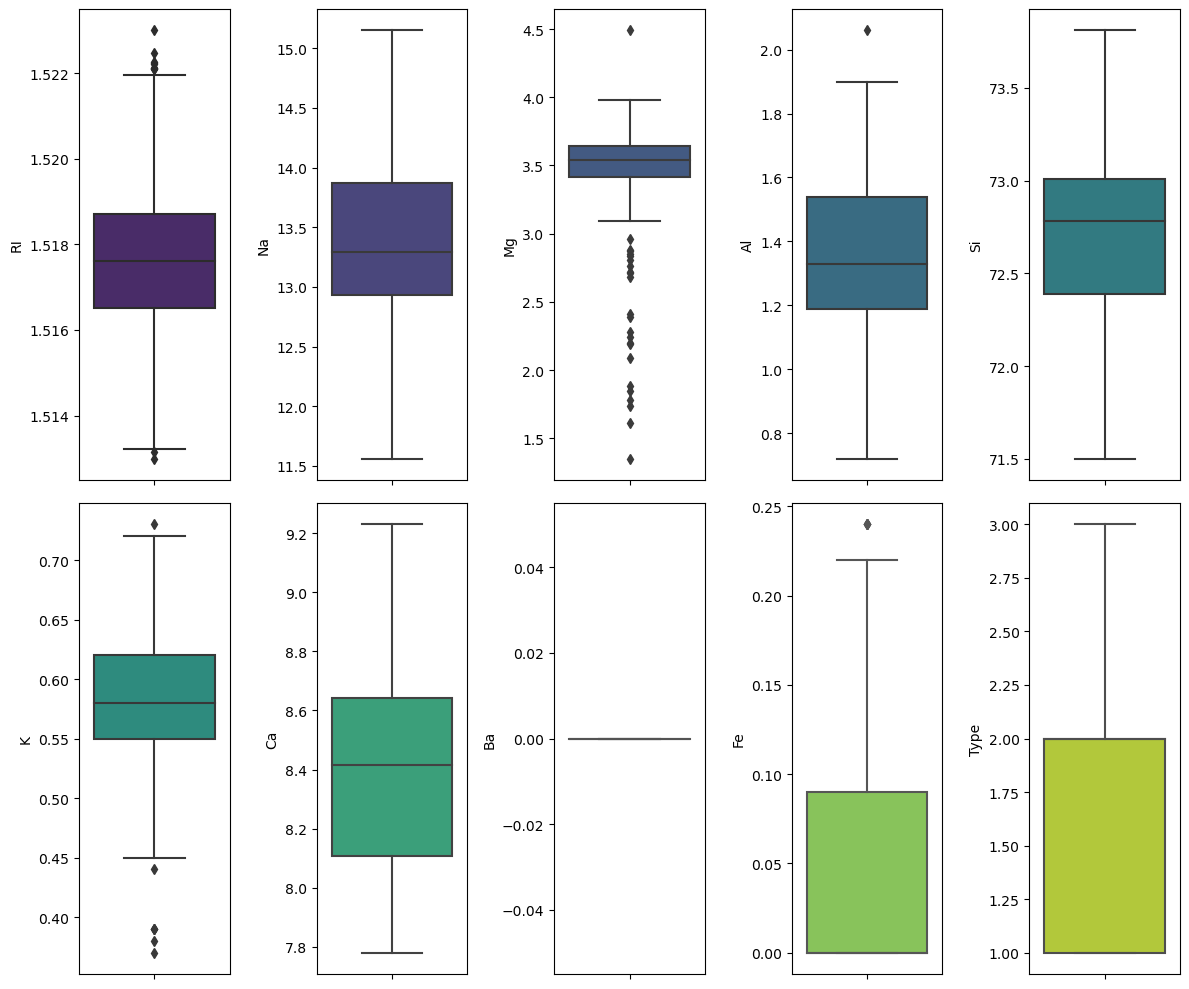

In [10]:
### outliers--
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
b1 = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
colors = sns.color_palette('viridis', n_colors=len(b1))
df_copy = df.copy()
for i, (variable, color) in enumerate(zip(b1, colors)):
    Q1 = df_copy[variable].quantile(0.25)
    Q3 = df_copy[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_copy = df_copy[(df_copy[variable] >= lower_bound) & (df_copy[variable] <= upper_bound)]
    sns.boxplot(data=df_copy, y=variable, ax=axes[i // 5, i % 5], color=color)
plt.tight_layout()
plt.show()

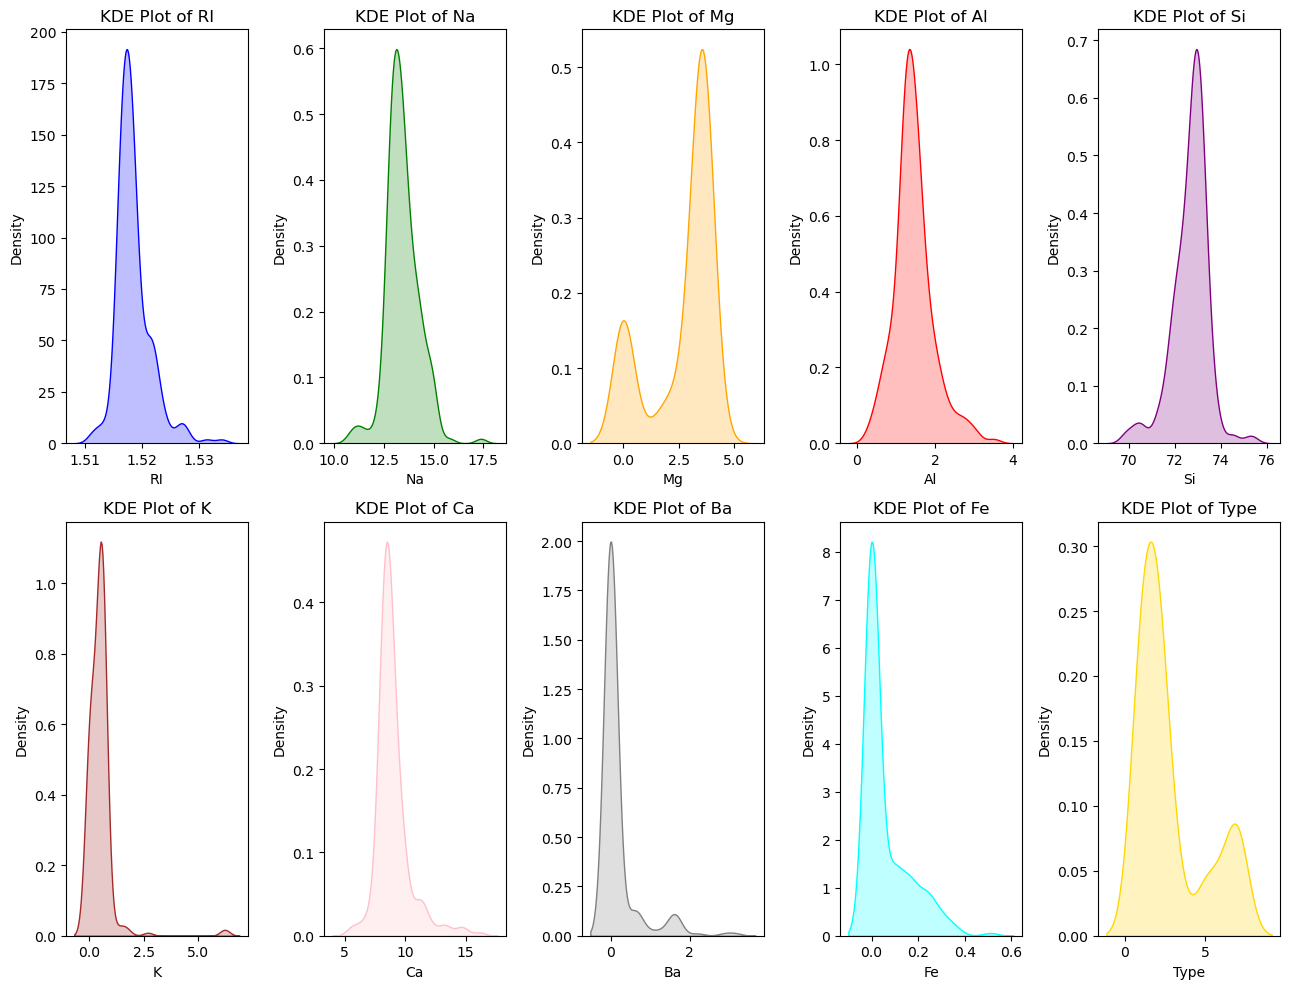

In [11]:
## KDE--plot---
kdeplots = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan','gold']
plt.figure(figsize=(13, 10))
for i, (column, color) in enumerate(zip(kdeplots, colors), 1):
    plt.subplot(2, 5, i)  # Adjust the subplot layout as needed
    sns.kdeplot(df[column], shade=True,color=color)
    plt.title(f'KDE Plot of {column}')
plt.tight_layout()
plt.show()

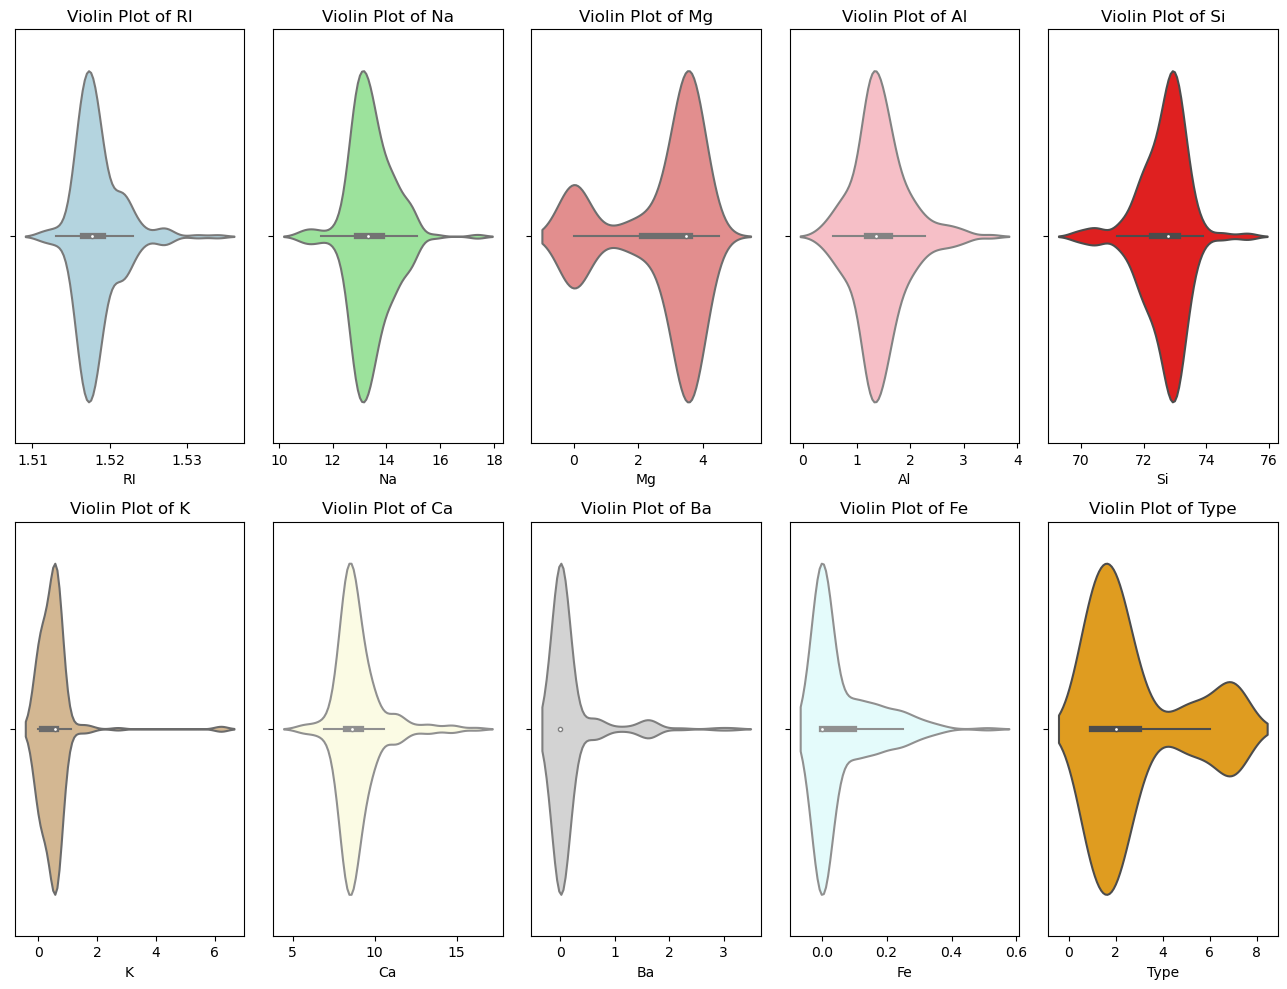

In [12]:
### VIOLIN PLOTS---
violinplots = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']
violin_colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightpink', 'red', 'burlywood', 'lightyellow', 'lightgray', 'lightcyan','orange']
plt.figure(figsize=(13,10))
for i, (violin_column, violin_color) in enumerate(zip(violinplots, violin_colors), 1):
    plt.subplot(2, 5, i)  # Start the index from 1
    sns.violinplot(x=df[violin_column], color=violin_color)
    plt.title(f'Violin Plot of {violin_column}')
plt.tight_layout()
plt.show()

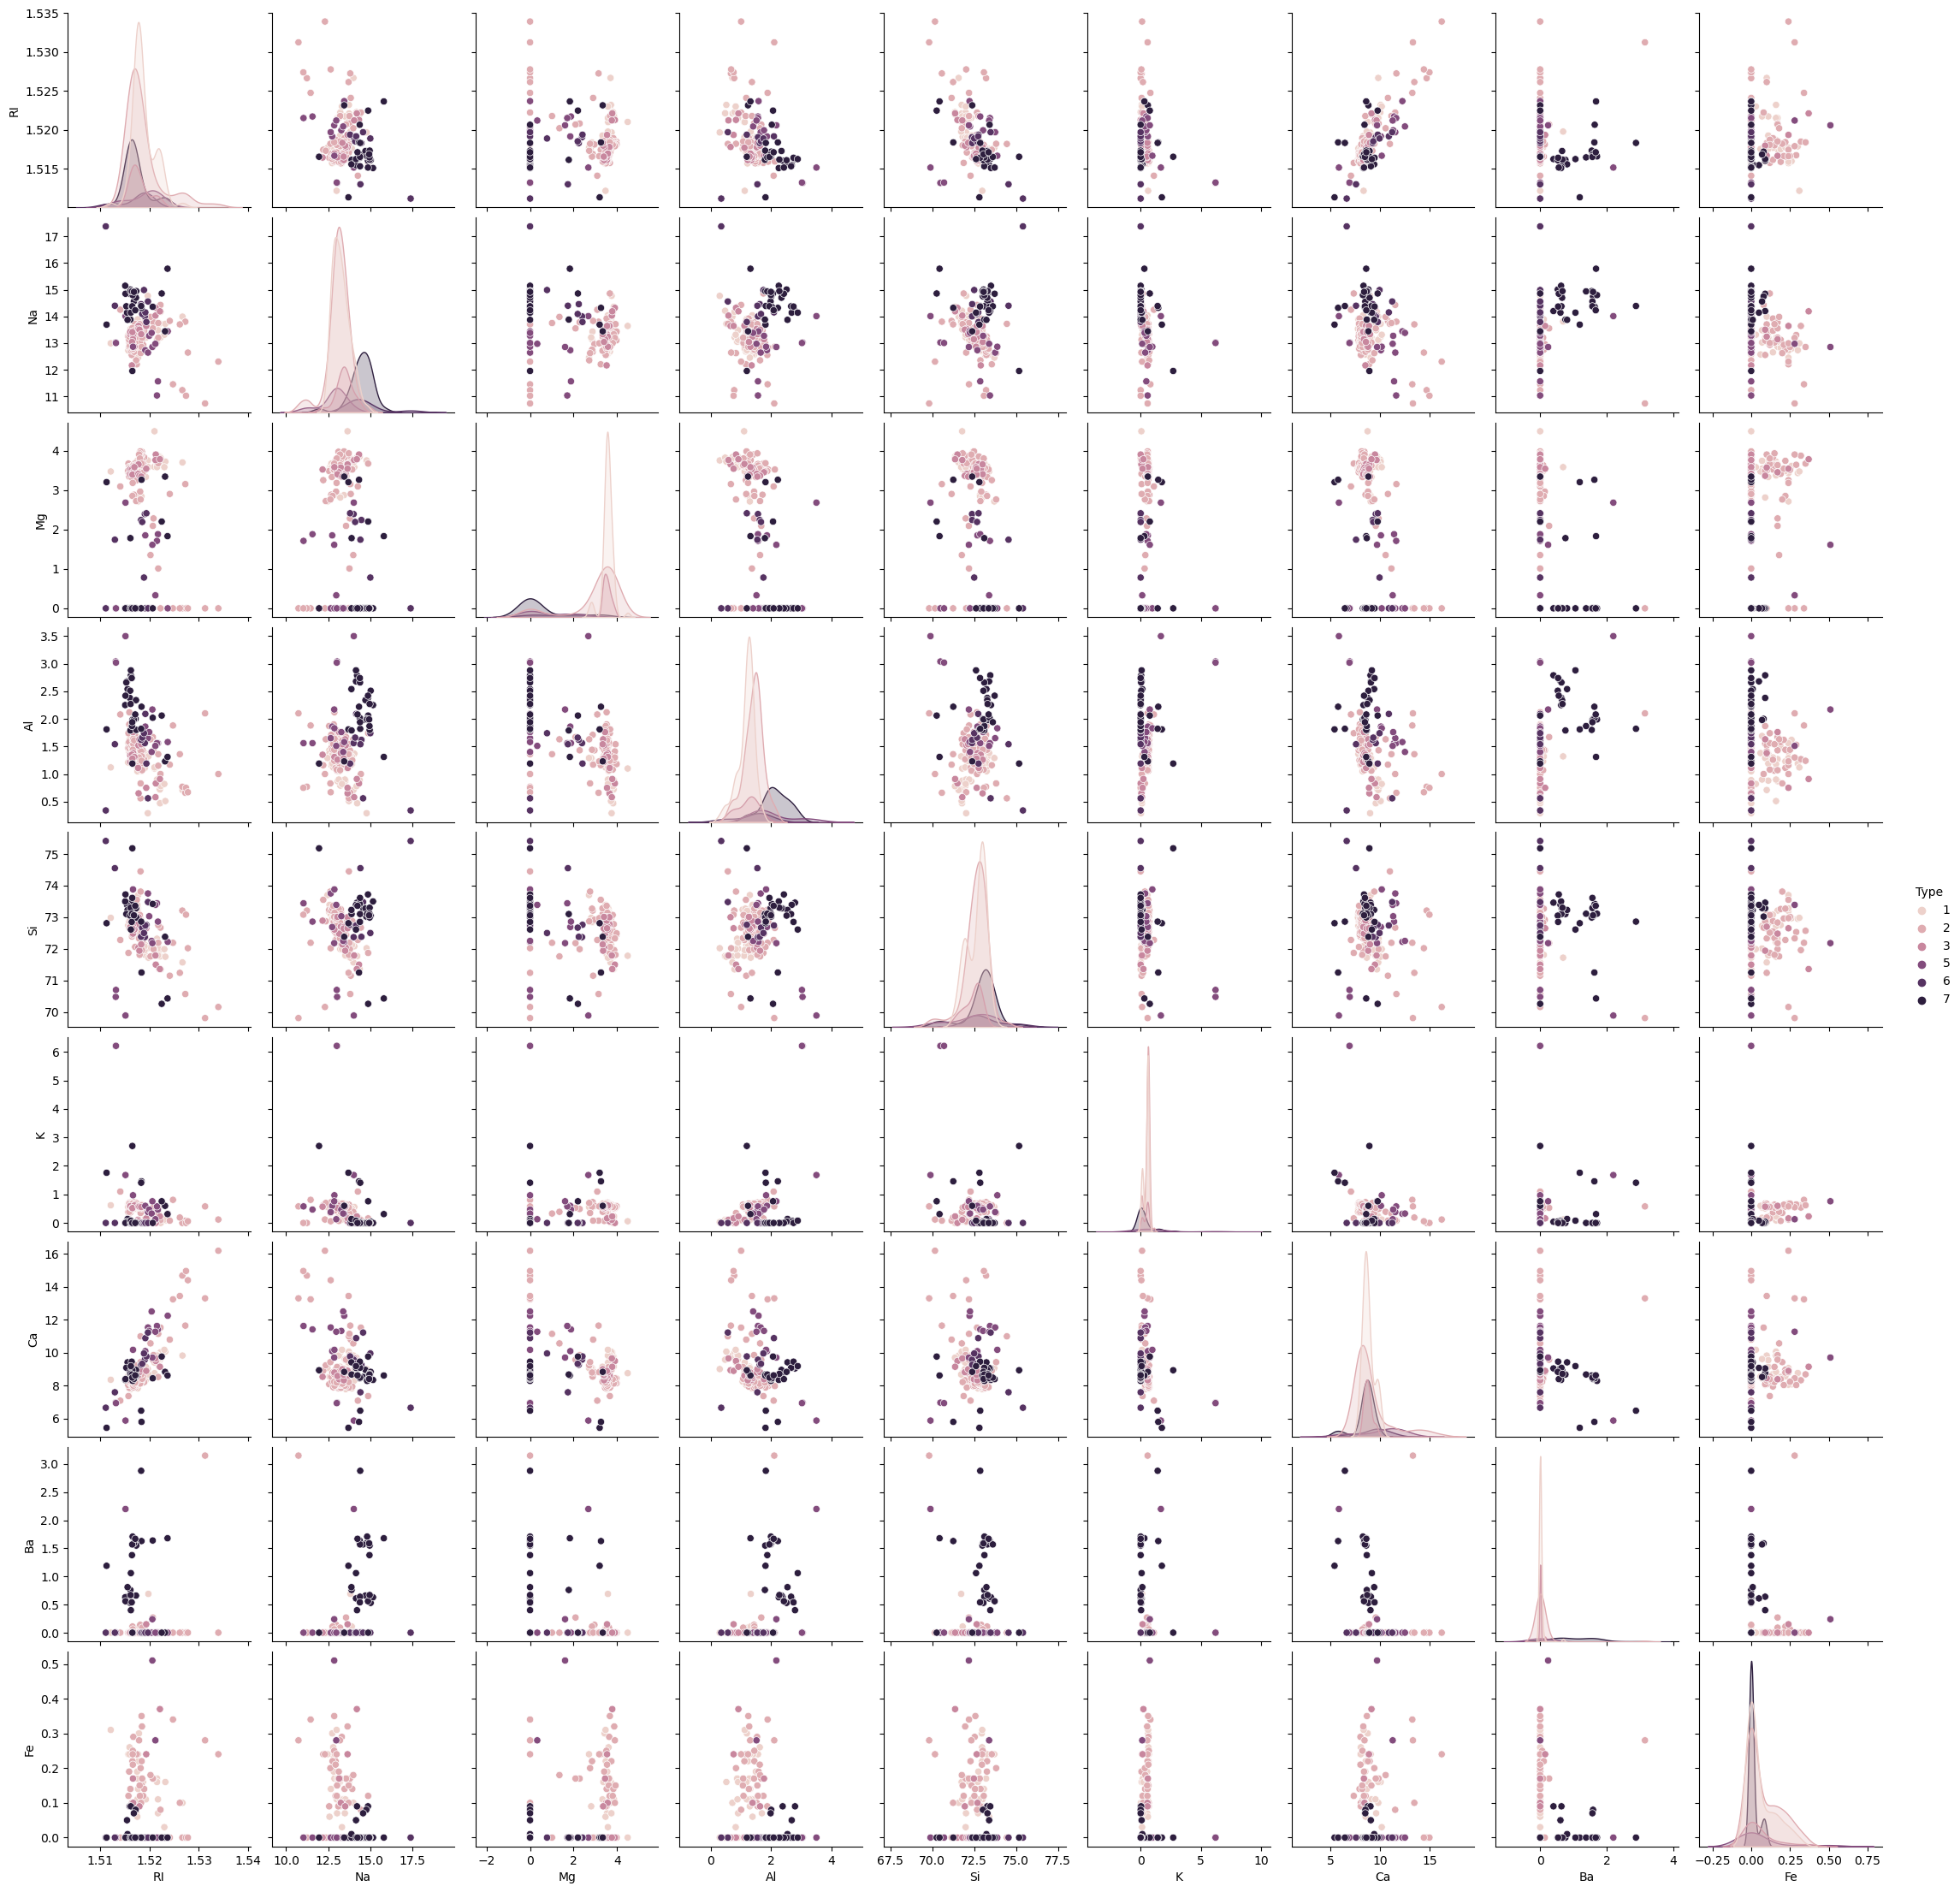

In [13]:
##-- Pair Plot--###
sns.pairplot(df,hue='Type')
plt.show()

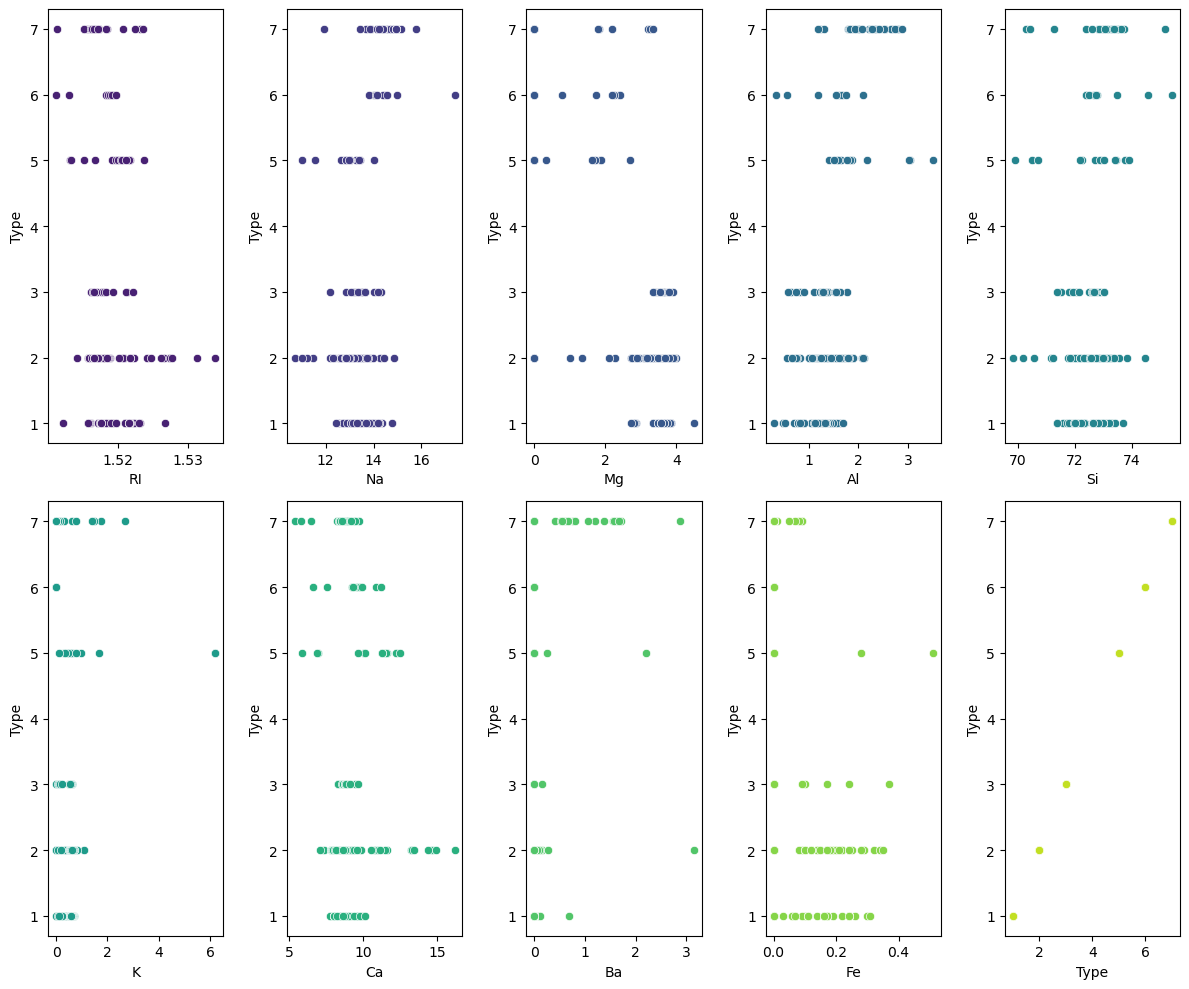

In [14]:
### ---Scatter plot---
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12,10))
h1 = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe','Type']
colors = sns.color_palette('viridis', n_colors=len(h1))
for i, (variable, color) in enumerate(zip(h1, colors)):
    sns.scatterplot(data=df, x=variable, y='Type', ax=axes[i // 5, i % 5], color=color)
plt.tight_layout()
plt.show()

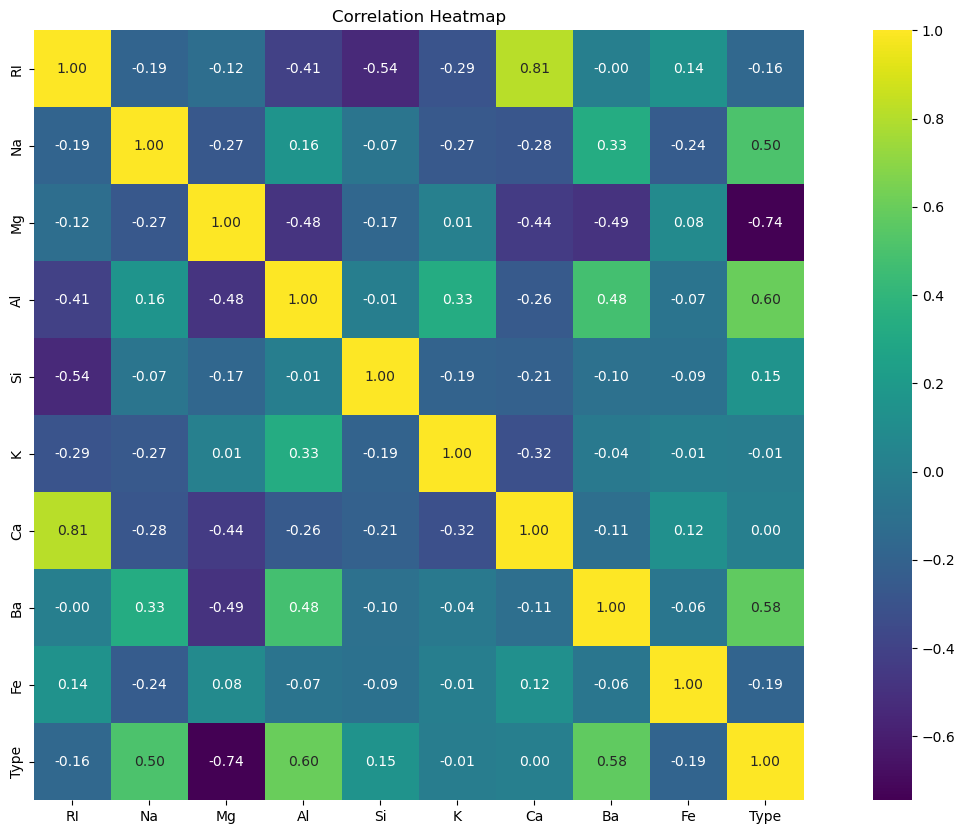

In [15]:
###-- Heat map---##
df_subset = df[kdeplots]
corr_matrix = df_subset.corr()
plt.figure(figsize=(18, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# Assuming 'target_column' is the column you want to predict
y = df['Type']
x = df.drop('Type', axis=1)

In [17]:
print(x,y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns] 0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [18]:
### KNN Classifier
K1_train=[]
K1_test=[]

In [19]:
KNN = KNeighborsClassifier(n_neighbors=1)

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    KNN.fit(x_train, y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

In [20]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 1.0
Average test accuracy: 0.712


In [21]:
K1_train.append(np.mean(training_accuracy).round(3))
K1_test.append(np.mean(test_accuracy).round(3))

print(K1_train)
print(K1_test)


[1.0]
[0.712]


In [22]:
# -- K=3
KNN = KNeighborsClassifier(n_neighbors=3)

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    KNN.fit(x_train, y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))


In [23]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.816
Average test accuracy: 0.66


In [24]:
K1_train.append(np.mean(training_accuracy).round(3))
K1_test.append(np.mean(test_accuracy).round(3))

print(K1_train)
print(K1_test)

[1.0, 0.816]
[0.712, 0.66]


In [25]:
# -- k=5
KNN = KNeighborsClassifier(n_neighbors=5)

training_accuracy = []
test_accuracy = []

for i in range(1, 101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    KNN.fit(x_train, y_train)
    y_pred_train = KNN.predict(x_train)
    y_pred_test = KNN.predict(x_test)
    training_accuracy.append(accuracy_score(y_train, y_pred_train))
    test_accuracy.append(accuracy_score(y_test, y_pred_test))

In [26]:
print("Average training accuracy:",np.mean(training_accuracy).round(3))
print("Average test accuracy:",np.mean(test_accuracy).round(3))

Average training accuracy: 0.749
Average test accuracy: 0.641


In [27]:
K1_train.append(np.mean(training_accuracy).round(3))
K1_test.append(np.mean(test_accuracy).round(3))

print(K1_train)
print(K1_test)

[1.0, 0.816, 0.749]
[0.712, 0.66, 0.641]


In [28]:
# parameters selection
kf = KFold(n_splits=10)
grid_params ={
    'n_neighbors':[1,2,3,4,5,6],
    'weights':['uniform','distance'],
    'metric' :['eclidean', 'manhattan']
}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose =10, cv=6,n_jobs=-1)
gs_results = gs.fit(x_train, y_train)

Fitting 6 folds for each of 24 candidates, totalling 144 fits


In [29]:
gs_results.best_score_

gs_results.best_estimator_

model_final = gs_results.best_estimator_

pred_final = model_final.predict(x_test)
acc_final= accuracy_score(y_test,pred_final)
print("The accuracy is  {}".format(acc_final))

The accuracy is  0.7384615384615385


In [30]:
k_values = np.arange(1,5)

training_accuracy = []
test_accuracy = []


for i, k in enumerate(k_values):
    # k from 1 to 5(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    training_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

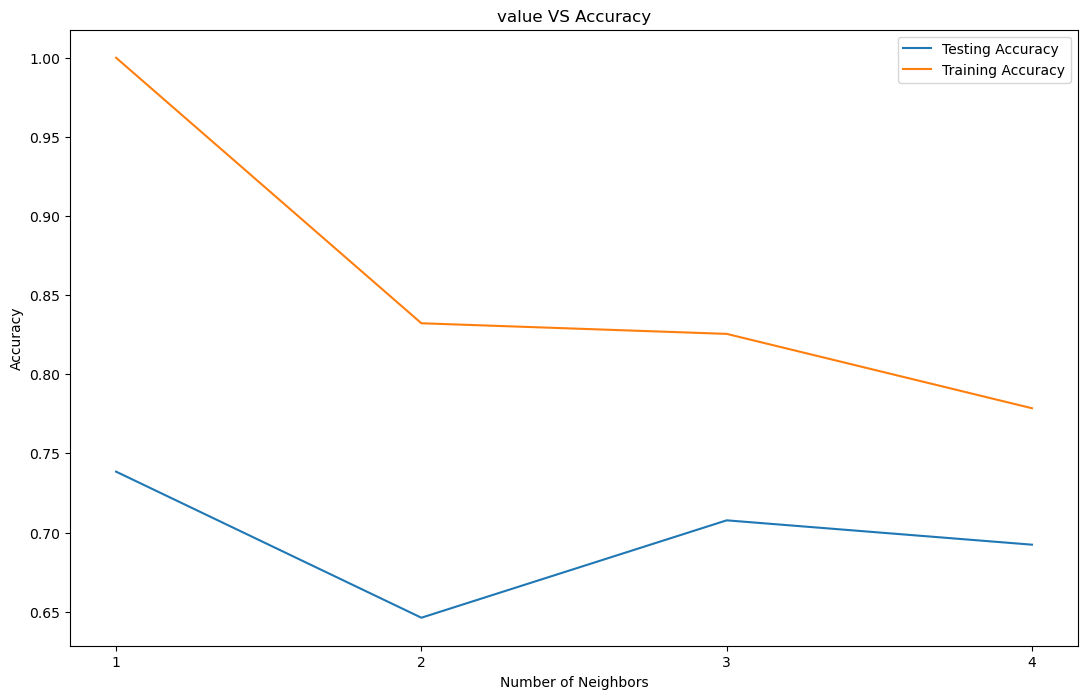

Best accuracy is 0.7384615384615385 with K = 1


In [31]:
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, training_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))